# Imports

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
bitcoin_data

DOGE-USD                                                      \
                Open      High       Low     Close Adj Close      Volume   
Date                                                                       
2022-04-18  0.139471  0.140461  0.134384  0.140286  0.140286   909718484   
2022-04-19  0.140297  0.144141  0.139500  0.142665  0.142665   679511647   
2022-04-20  0.142677  0.146241  0.139595  0.140878  0.140878  1068542289   
2022-04-21  0.140868  0.142448  0.135255  0.136365  0.136365   740549793   
2022-04-22  0.136357  0.137908  0.134985  0.136395  0.136395   505251263   
...              ...       ...       ...       ...       ...         ...   
2023-04-14  0.087485  0.091116  0.085879  0.088785  0.088785  1007326042   
2023-04-15  0.088785  0.090447  0.087653  0.088974  0.088974   463978095   
2023-04-16  0.088968  0.091515  0.088231  0.090472  0.090472   594760862   
2023-04-17  0.090482  0.094595  0.088577  0.091449  0.091449  1360494890   
2023-04-18  0.091440  0.093477  0.090118  0.092989  0.092989  1436697088   

                 BTC-USD                                            \
                    Open          High           Low         Close   
Date                                                                 
2022-04-18  39721.203125  40986.320312  38696.191406  40826.214844   
2022-04-19  40828.175781  41672.960938  40618.632812  41502.750000   
2022-04-20  41501.746094  42126.300781  40961.097656  41374.378906   
2022-04-21  41371.515625  42893.582031  40063.828125  40527.363281   
2022-04-22  40525.863281  40777.757812  39315.417969  39740.320312   
...                  ...           ...           ...           ...   
2023-04-14  30409.562500  31005.607422  30044.498047  30485.699219   
2023-04-15  30490.750000  30601.740234  30245.882812  30318.496094   
2023-04-16  30315.976562  30555.537109  30157.832031  30315.355469   
2023-04-17  30317.146484  30319.197266  29275.371094  29445.044922   
2023-04-18  29446.875000  29733.179688  29242.328125  29720.878906   

                                           ETH-USD                            \
               Adj Close       Volume         Open         High          Low   
Date                                                                           
2022-04-18  40826.214844  33705182072  2993.483887  3062.520996  2893.912842   
2022-04-19  41502.750000  25303206547  3057.570312  3125.084229  3035.535156   
2022-04-20  41374.378906  27819532341  3103.935059  3157.885742  3045.288330   
2022-04-21  40527.363281  35372786395  3077.829346  3173.451416  2962.410400   
2022-04-22  39740.320312  28011716745  2986.938721  3024.854492  2942.358643   
...                  ...          ...          ...          ...          ...   
2023-04-14  30485.699219  22659995079  2013.930664  2126.316650  2011.503296   
2023-04-15  30318.496094  11940685378  2101.616455  2111.075439  2076.510742   
2023-04-16  30315.355469  12854816417  2092.281006  2137.445068  2076.832031   
2023-04-17  29445.044922  17872186762  2120.001221  2120.113525  2063.038574   
2023-04-18  29720.878906  17112969216  2075.654541  2104.530518  2063.583984   

                                                   
                  Close    Adj Close       Volume  
Date                                               
2022-04-18  3057.606689  3057.606689  18629381299  
2022-04-19  3104.106445  3104.106445  14156035096  
2022-04-20  3077.745850  3077.745850  15547362265  
2022-04-21  2987.480713  2987.480713  20783591093  
2022-04-22  2964.835693  2964.835693  16782795477  
...                 ...          ...          ...  
2023-04-14  2101.635498  2101.635498  16298099411  
2023-04-15  2092.466797  2092.466797   8036468153  
2023-04-16  2120.005859  2120.005859   7898126856  
2023-04-17  2076.242920  2076.242920   9648882546  
2023-04-18  2104.530518  2104.530518   9248884736  

[366 rows x 18 columns]

# Initial Data Downloads

In [20]:
idx = pd.IndexSlice

In [ ]:
# Define the list of tickers to download
tech_tickers = ['AAPL', 'AMZN', 'META', 'GOOGL', 'MSFT', 'NFLX', 'NVDA', 'PYPL', 'TSLA', 'TWTR']
bitcoin_tickers = ['BTC-USD', 'ETH-USD', 'DOGE-USD']
bond_tickers = ['^TNX']


# Download the data using yfinance
tech_data = yf.download(tech_tickers, period='1y', group_by='ticker')
bitcoin_data = yf.download(bitcoin_tickers, period='1y', group_by='ticker')
bond_data = yf.download(bond_tickers, period='1y', group_by='ticker')

In [29]:
# Concatenate the data into a single DataFrame
data = pd.concat([tech_data.loc[:, idx[:, 'Adj Close']], 
                  bitcoin_data.loc[:, idx[:, 'Adj Close']], 
                  bond_data.loc[:, 'Adj Close']], axis=1)

data.columns = tech_tickers + bitcoin_tickers + bond_tickers

# Calculate the correlation matrix
corr_matrix = data.corr()

# Print the correlation matrix
print(corr_matrix)

          AAPL      AMZN      META     GOOGL      MSFT      NFLX      NVDA  \
AAPL       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
AMZN       NaN  1.000000 -0.128447  0.483808 -0.614149 -0.073965 -0.218612   
META       NaN -0.128447  1.000000  0.702994  0.362667  0.814425  0.067927   
GOOGL      NaN  0.483808  0.702994  1.000000 -0.152811  0.666691 -0.255352   
MSFT       NaN -0.614149  0.362667 -0.152811  1.000000  0.460134  0.715949   
NFLX       NaN -0.073965  0.814425  0.666691  0.460134  1.000000  0.252772   
NVDA       NaN -0.218612  0.067927 -0.255352  0.715949  0.252772  1.000000   
PYPL       NaN -0.518259  0.377531 -0.129848  0.905731  0.525871  0.802831   
TSLA       NaN -0.592645  0.621063  0.105849  0.773494  0.721157  0.487236   
TWTR       NaN  0.051549  0.544667  0.473620  0.621923  0.785235  0.567742   
BTC-USD    NaN -0.191011  0.782779  0.514881  0.437207  0.651468  0.177819   
ETH-USD    NaN -0.090185  0.653029  0.436289  0.475560  0.606556

# Data Exploration 

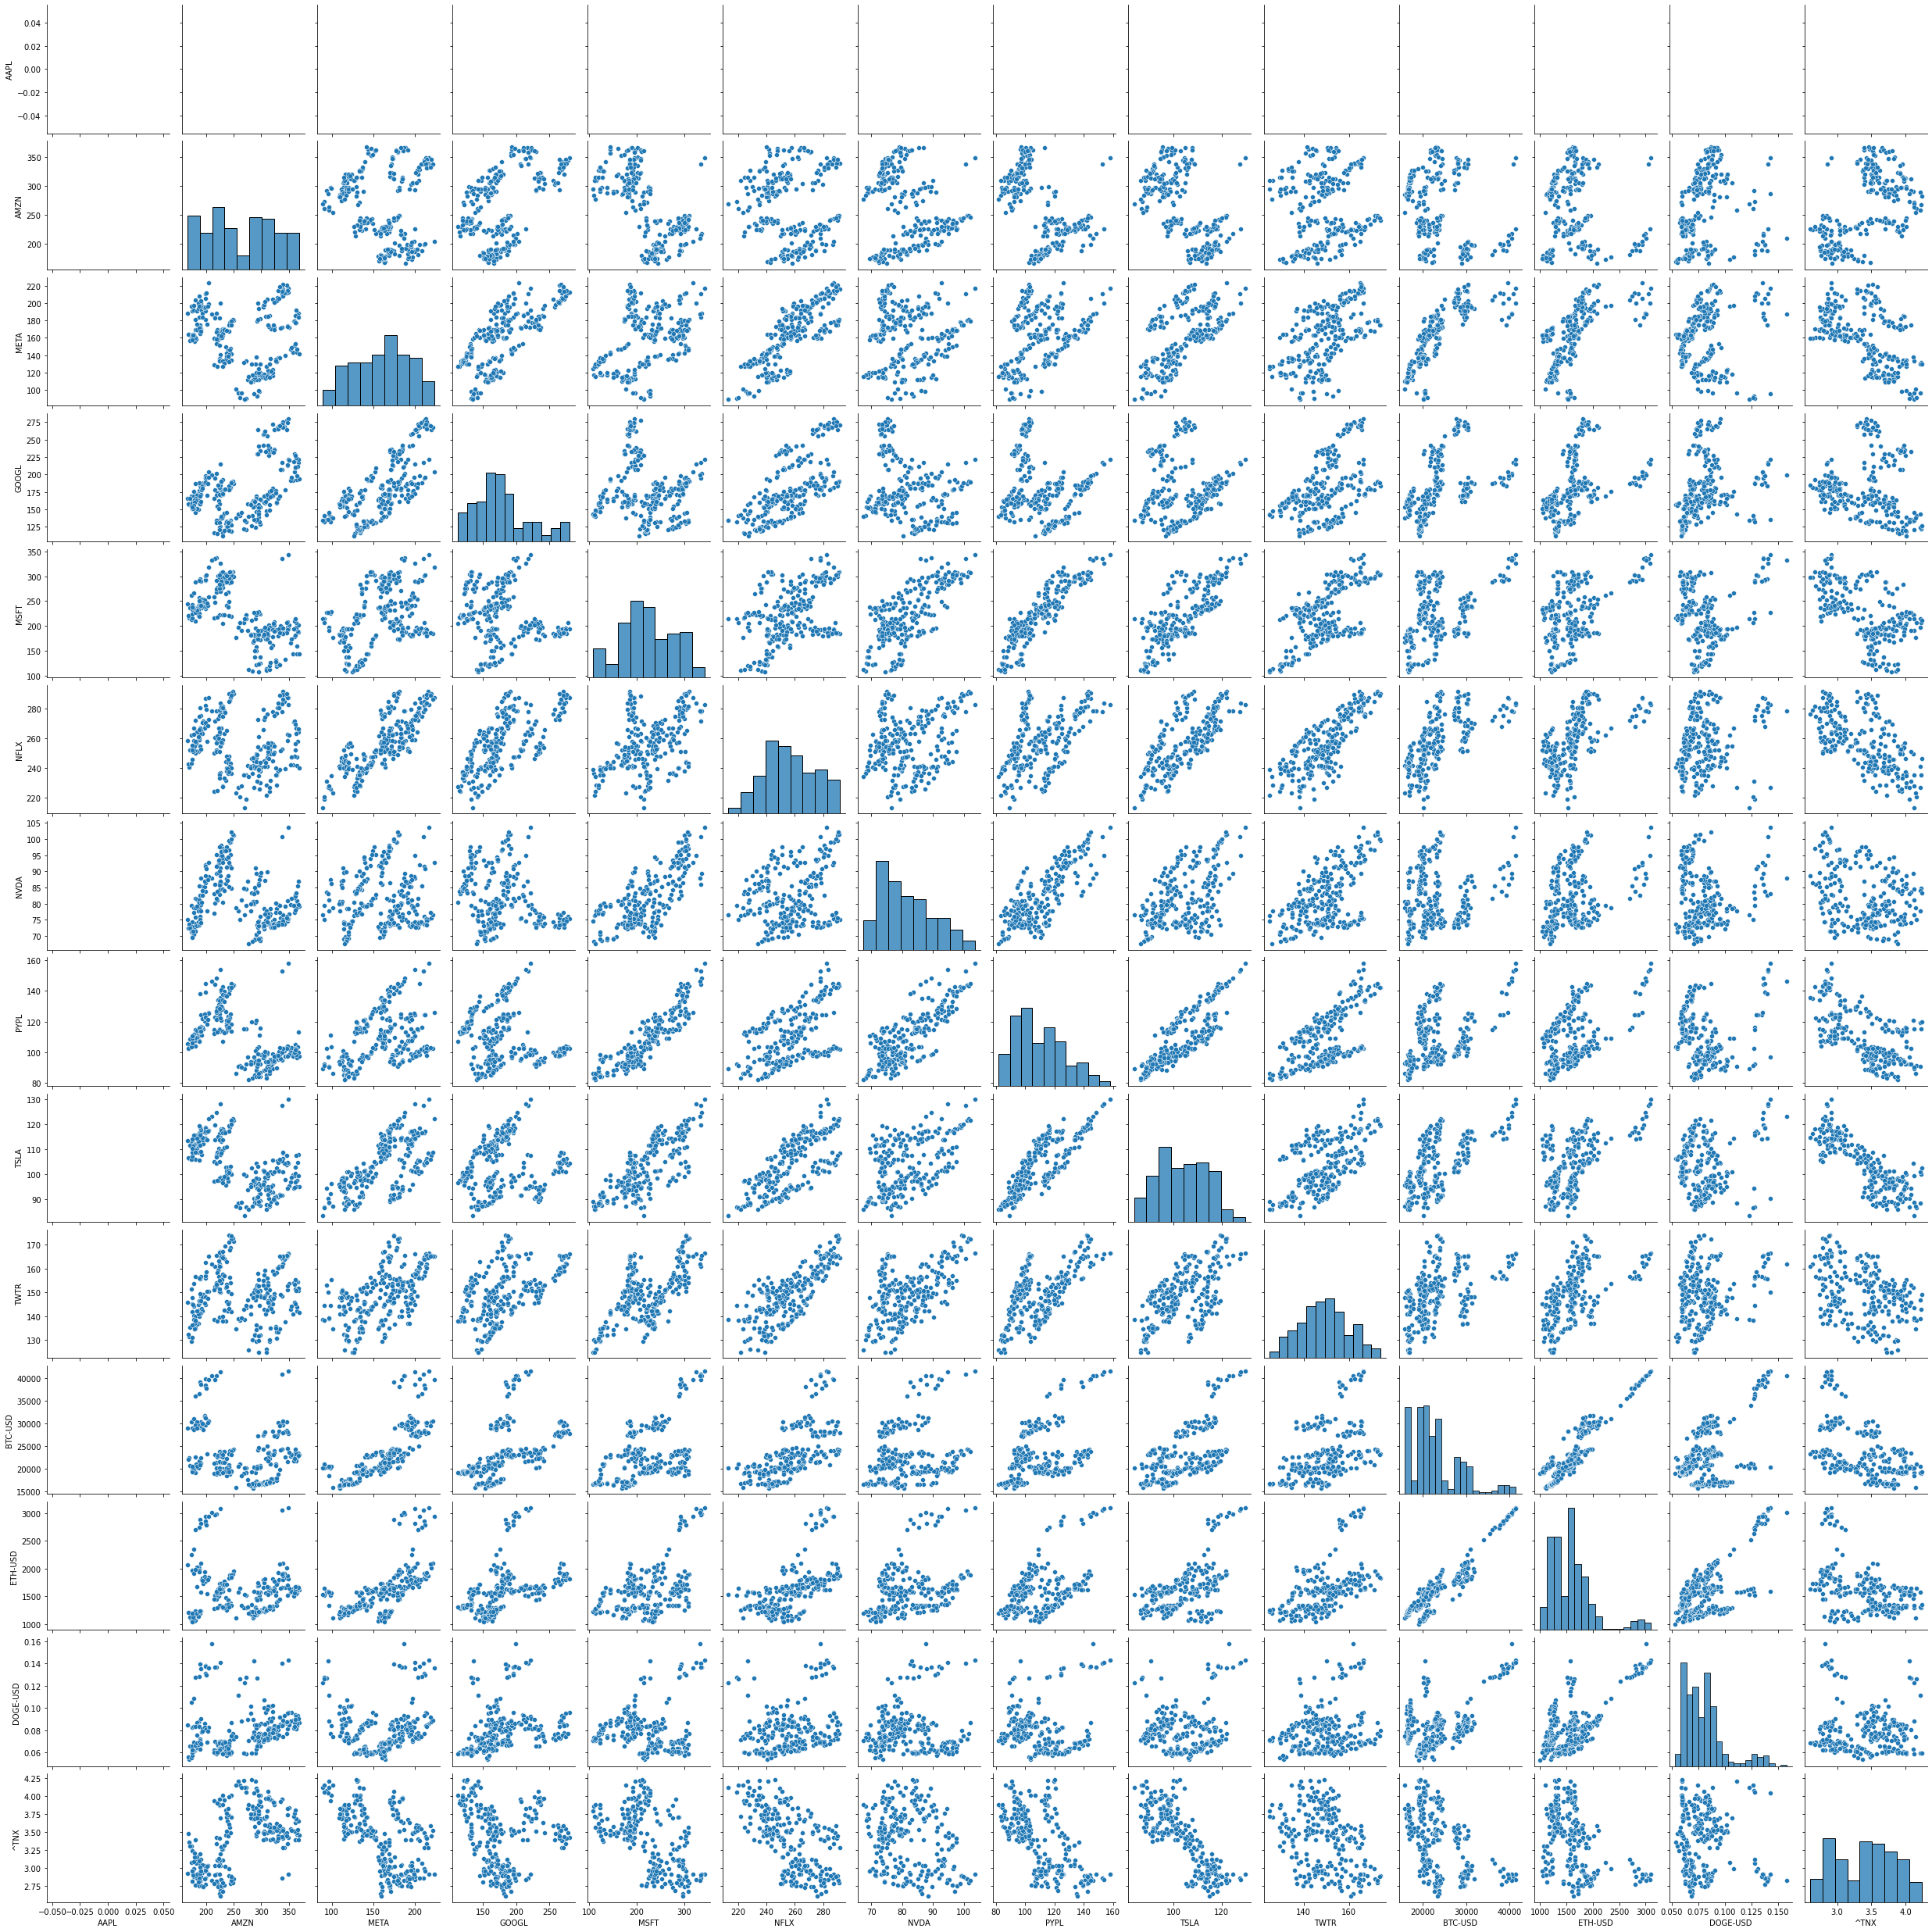

In [30]:
sns.pairplot(data)

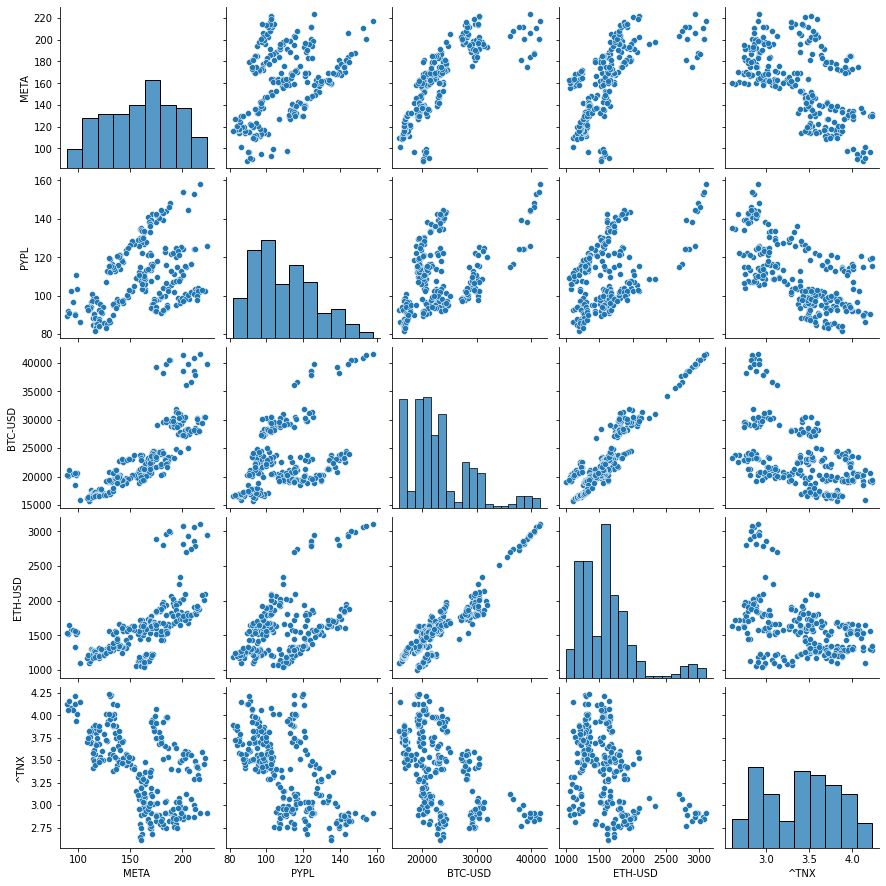

In [32]:
sns.pairplot(data[['META','PYPL','BTC-USD','ETH-USD','^TNX']])